# Support Vector Machines

In [3]:
library(e1071)
library(ggplot2)
library(caret)

In [4]:
df <- read.csv("polygon.data.perfect.csv")

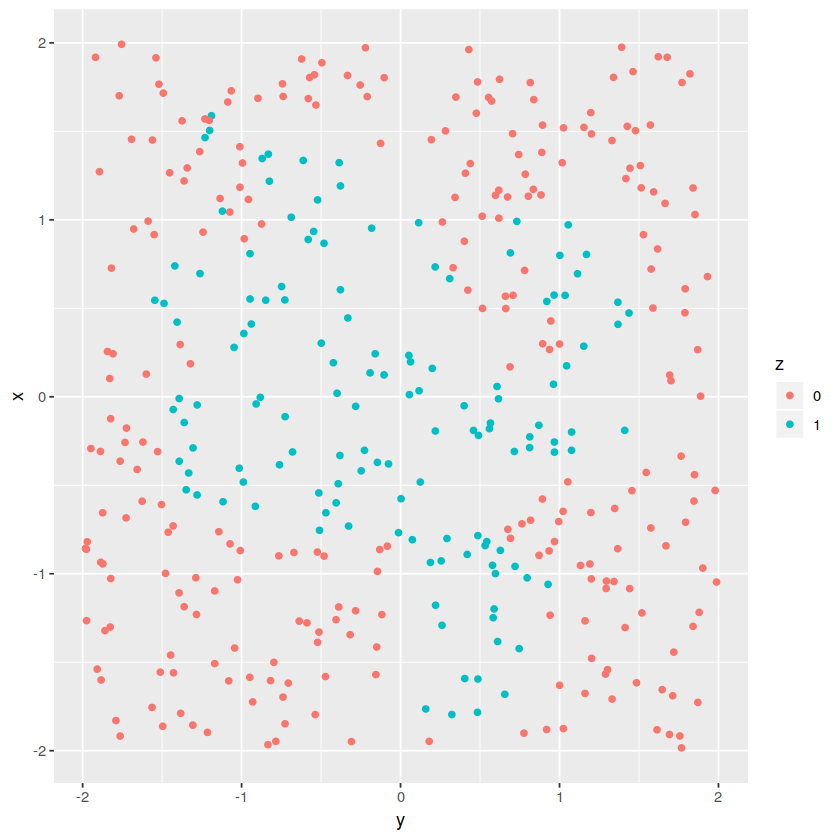

In [14]:
ggplot(df,aes(x=y,y=x,color=z))+geom_point()

In [6]:
df$z <- as.factor(df$z)

In [33]:
svm.fit <- svm(z~x+y,data=df,kernel="radial",gamma=5,cost=10)

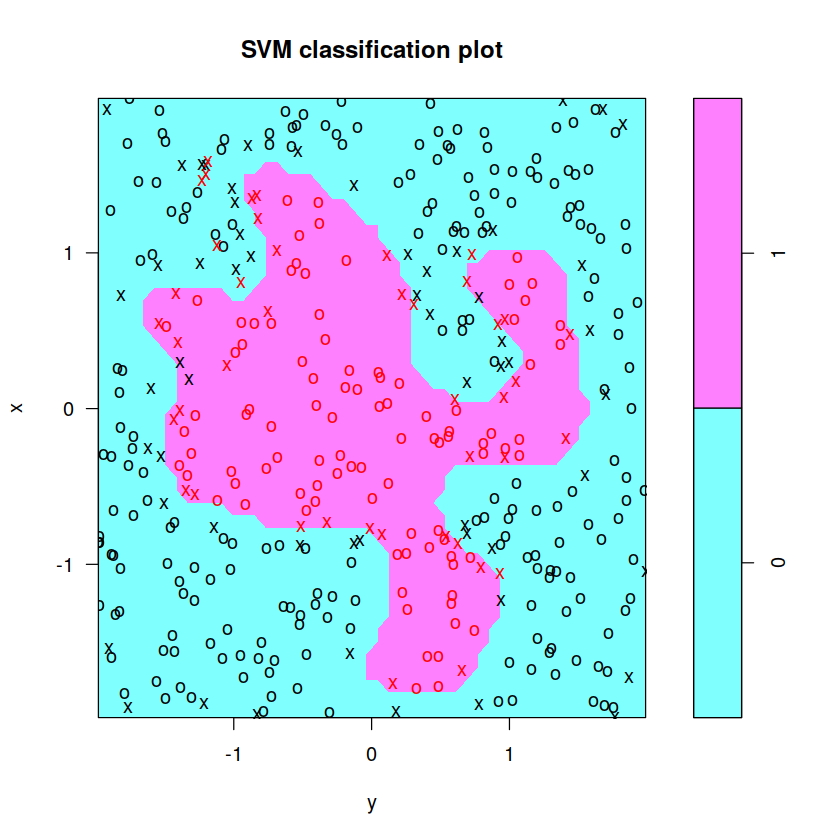

In [34]:
plot(svm.fit,df)

In [35]:
confusionMatrix(predict(svm.fit),df$z)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 259   6
         1   5 130
                                          
               Accuracy : 0.9725          
                 95% CI : (0.9513, 0.9862)
    No Information Rate : 0.66            
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9386          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9811          
            Specificity : 0.9559          
         Pos Pred Value : 0.9774          
         Neg Pred Value : 0.9630          
             Prevalence : 0.6600          
         Detection Rate : 0.6475          
   Detection Prevalence : 0.6625          
      Balanced Accuracy : 0.9685          
                                          
       'Positive' Class : 0               
                                          

In [38]:
glm.fit <- glm(z~x+y,data=df,family="binomial")
pred <- factor(as.numeric((predict(glm.fit,type="response")>0.5)),levels=c(0,1))
confusionMatrix(pred,df$z)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 264 136
         1   0   0
                                          
               Accuracy : 0.66            
                 95% CI : (0.6113, 0.7063)
    No Information Rate : 0.66            
    P-Value [Acc > NIR] : 0.5233          
                                          
                  Kappa : 0               
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.00            
            Specificity : 0.00            
         Pos Pred Value : 0.66            
         Neg Pred Value :  NaN            
             Prevalence : 0.66            
         Detection Rate : 0.66            
   Detection Prevalence : 1.00            
      Balanced Accuracy : 0.50            
                                          
       'Positive' Class : 0               
                                          

In [39]:
df2 <- df
df2$x2 <- df$x^2
df2$y2 <- df$y^2
df2$x3 <- df$x^3
df2$y3 <- df$y^3
glm.fit <- glm(z~(x+y+x2+y2+x3+y3)^2,data=df2,family="binomial")
pred <- factor(as.numeric((predict(glm.fit,type="response")>0.5)),levels=c(0,1))
confusionMatrix(pred,df2$z)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 240  16
         1  24 120
                                          
               Accuracy : 0.9             
                 95% CI : (0.8663, 0.9276)
    No Information Rate : 0.66            
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7803          
 Mcnemar's Test P-Value : 0.2684          
                                          
            Sensitivity : 0.9091          
            Specificity : 0.8824          
         Pos Pred Value : 0.9375          
         Neg Pred Value : 0.8333          
             Prevalence : 0.6600          
         Detection Rate : 0.6000          
   Detection Prevalence : 0.6400          
      Balanced Accuracy : 0.8957          
                                          
       'Positive' Class : 0               
                                          